**<font color='red'>Crash analysis - Datasets (accident data)</font>**

* Overall declarion: 
* Dataset division accroding to variables types - continious and categorical : 
* Exploratory analysis - each group of variable and all together
* Base line to explore other datas sets

# <font color='blue'> Research </font>

## Objectives:

* Familiarise yourself with crash data set.
* Exploratory analysis..

> __Common objectives of all work:__
> Understand how accidents are related to network configuration/topology and traffic conditions. This will be framework to develop anserws/solutions to improve safety and network conditions. 
    
> __Work will be diveded in three main steps:__

* Accident data and its relationship to the network configuration/topology
* Accident data and its relationship to network traffic condition
* Provide solutions this framework - understand and simulate responses in order to improve safety and network condition. Focus on Autonomous vehicles. 

Motivation: Safety, lifes and network improvemtends. Gain further theoretical and practical knowledge beyond the subject material. Furthermore, working with disruptive technologies and the state-of-art. 

## Research question:


> In the future, define research question

# Libraries and dataset


In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import osmnx as ox
import numpy as np 

import seaborn as sns
import scipy.stats as ss
import itertools


import math

from matplotlib import pyplot as plt
from scipy.spatial import Voronoi
from shapely.geometry import MultiPoint, Point, Polygon
from operator import itemgetter
#library to compte variables association
from dython import nominal

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [25]:
data = pd.read_csv('ACCIDENT.csv')
print(list(zip(np.arange(100),data.columns.tolist())))
print('data_shape:',data.shape)

[(0, 'ACCIDENT_NO'), (1, 'ACCIDENTDATE'), (2, 'ACCIDENTTIME'), (3, 'ACCIDENT_TYPE'), (4, 'Accident Type Desc'), (5, 'DAY_OF_WEEK'), (6, 'Day Week Description'), (7, 'DCA_CODE'), (8, 'DCA Description'), (9, 'DIRECTORY'), (10, 'EDITION'), (11, 'PAGE'), (12, 'GRID_REFERENCE_X'), (13, 'GRID_REFERENCE_Y'), (14, 'LIGHT_CONDITION'), (15, 'Light Condition Desc'), (16, 'NODE_ID'), (17, 'NO_OF_VEHICLES'), (18, 'NO_PERSONS'), (19, 'NO_PERSONS_INJ_2'), (20, 'NO_PERSONS_INJ_3'), (21, 'NO_PERSONS_KILLED'), (22, 'NO_PERSONS_NOT_INJ'), (23, 'POLICE_ATTEND'), (24, 'ROAD_GEOMETRY'), (25, 'Road Geometry Desc'), (26, 'SEVERITY'), (27, 'SPEED_ZONE')]
data_shape: (186546, 28)


C:\Users\gabriel\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data processing

## Objectives:

* Prliminar data analysis - data types; size; number of entrances; null values 
* Divide data set according to data type


In [26]:
data.dtypes

ACCIDENT_NO             object
ACCIDENTDATE            object
ACCIDENTTIME            object
ACCIDENT_TYPE            int64
Accident Type Desc      object
DAY_OF_WEEK              int64
Day Week Description    object
DCA_CODE                 int64
DCA Description         object
DIRECTORY               object
EDITION                 object
PAGE                    object
GRID_REFERENCE_X        object
GRID_REFERENCE_Y        object
LIGHT_CONDITION          int64
Light Condition Desc    object
NODE_ID                  int64
NO_OF_VEHICLES           int64
NO_PERSONS               int64
NO_PERSONS_INJ_2         int64
NO_PERSONS_INJ_3         int64
NO_PERSONS_KILLED        int64
NO_PERSONS_NOT_INJ       int64
POLICE_ATTEND            int64
ROAD_GEOMETRY            int64
Road Geometry Desc      object
SEVERITY                 int64
SPEED_ZONE               int64
dtype: object

In [62]:
categorical_list = []
for i in range (len(data.columns)):
    if (data.iloc[:,i].dtypes) == object:
        print(i,data.columns[i])
        print('number of entrances:',len(data.iloc[:,i].unique()))
        #categorical_list.append(data.columns[i])
        print(data.iloc[:,i].unique(),'\n')
#data.dtypes

0 ACCIDENT_NO
number of entrances: 186546
['T20060000010' 'T20060000018' 'T20060000022' ... 'T20190026322'
 'T20190026336' 'T20190026346'] 

1 ACCIDENTDATE
number of entrances: 5109
['13/01/2006' '14/01/2006' '15/01/2006' ... '25/12/2019' '26/12/2019'
 '27/12/2019'] 

2 ACCIDENTTIME
number of entrances: 1440
['12:42:00' '19:10:00' '12:10:00' ... '3:01:00' '5:16:00' '5:23:00'] 

4 Accident Type Desc
number of entrances: 9
['Collision with vehicle' 'Fall from or in moving vehicle'
 'Collision with a fixed object' 'Struck Pedestrian'
 'collision with some other object' 'Vehicle overturned (no collision)'
 'No collision and no object struck' 'Struck animal' 'Other accident'] 

6 Day Week Description
number of entrances: 7
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday'] 

8 DCA Description
number of entrances: 81
['RIGHT NEAR (INTERSECTIONS ONLY)               '
 'FELL IN/FROM VEHICLE                    '
 'REAR END(VEHICLES IN SAME LANE)               '
 'RIGHT THR

['Day' 'Dark Street lights on' 'Dark No street lights' 'Dusk/Dawn'
 'Unknown' 'Dark Street lights unknown' 'Dark Street lights off'] 

25 Road Geometry Desc
number of entrances: 9
['Cross intersection' 'T intersection' 'Not at intersection'
 'Multiple intersection' 'Y intersection' 'Unknown' 'Dead end'
 'Private property' 'Road closure'] 



In [28]:
# Data processing - null values
data[data.isnull()]
data.isnull().values.any()
data.isnull().sum()

ACCIDENT_NO                0
ACCIDENTDATE               0
ACCIDENTTIME               0
ACCIDENT_TYPE              0
Accident Type Desc         0
DAY_OF_WEEK                0
Day Week Description       0
DCA_CODE                   0
DCA Description            0
DIRECTORY               1177
EDITION                 1177
PAGE                    1177
GRID_REFERENCE_X        1177
GRID_REFERENCE_Y        1177
LIGHT_CONDITION            0
Light Condition Desc       0
NODE_ID                    0
NO_OF_VEHICLES             0
NO_PERSONS                 0
NO_PERSONS_INJ_2           0
NO_PERSONS_INJ_3           0
NO_PERSONS_KILLED          0
NO_PERSONS_NOT_INJ         0
POLICE_ATTEND              0
ROAD_GEOMETRY              0
Road Geometry Desc         0
SEVERITY                   0
SPEED_ZONE                 0
dtype: int64

### Look for variables association
THis stage is go gain inshights about variables association. For that somes approaches will be considered. The dataset is diveded according variables types. Analysis are performed for Categorical-categorical variables; continuous-continuous and categorical-continous. 

The analysis used are:


* continuous variables : [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) - *results in range [-1,1]
* categorical variables : [Cramér's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) and [Uncertainty coefficient or Theil's U](https://en.wikipedia.org/wiki/Uncertainty_coefficient) - *results in range [0,1]
* continuous-categorical variables : [Correlation ratio](https://en.wikipedia.org/wiki/Correlation_ratio)- *results in range [0,1]

Furthermore,some plots are presented. Mostly histograms and scatter plots

Some good resources: check e.g. [The Search for Categorical Correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)


# <font color='green'> Continuous variables </font>


In [30]:
df_continuous = data.select_dtypes(exclude=['object'])
print(list(zip(np.arange(100),df_continuous.columns.tolist())))
print('data_shape:',df_continuous.shape)

[(0, 'ACCIDENT_TYPE'), (1, 'DAY_OF_WEEK'), (2, 'DCA_CODE'), (3, 'LIGHT_CONDITION'), (4, 'NODE_ID'), (5, 'NO_OF_VEHICLES'), (6, 'NO_PERSONS'), (7, 'NO_PERSONS_INJ_2'), (8, 'NO_PERSONS_INJ_3'), (9, 'NO_PERSONS_KILLED'), (10, 'NO_PERSONS_NOT_INJ'), (11, 'POLICE_ATTEND'), (12, 'ROAD_GEOMETRY'), (13, 'SEVERITY'), (14, 'SPEED_ZONE')]
data_shape: (186546, 15)


In [31]:
# Data processing - null values
df_continuous[df_continuous.isnull()]
df_continuous.isnull().values.any()
df_continuous.isnull().sum()

ACCIDENT_TYPE         0
DAY_OF_WEEK           0
DCA_CODE              0
LIGHT_CONDITION       0
NODE_ID               0
NO_OF_VEHICLES        0
NO_PERSONS            0
NO_PERSONS_INJ_2      0
NO_PERSONS_INJ_3      0
NO_PERSONS_KILLED     0
NO_PERSONS_NOT_INJ    0
POLICE_ATTEND         0
ROAD_GEOMETRY         0
SEVERITY              0
SPEED_ZONE            0
dtype: int64

In [63]:
#df_continuous.describe()

# Correlation matrix

*results in range [-1,1]

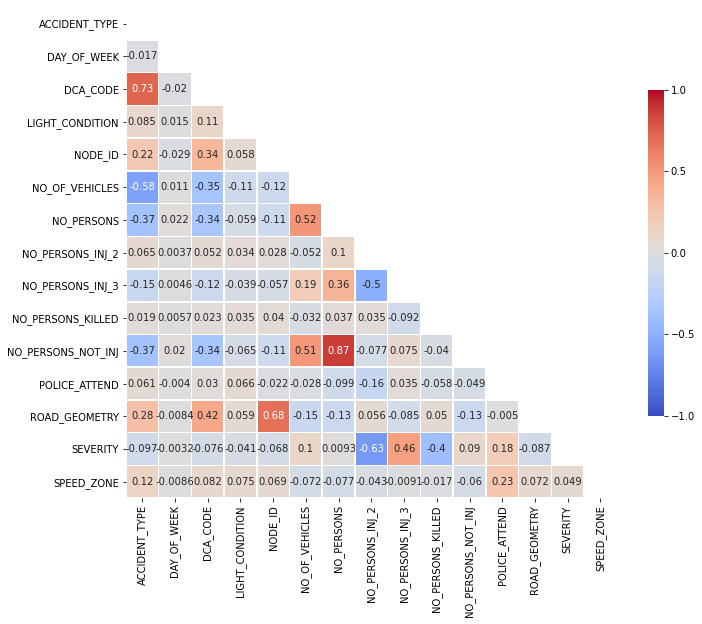

In [64]:
corr = df_continuous.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10},
                      fmt='.2g')


#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)


sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [17]:
corr.style.background_gradient(cmap='coolwarm', axis=None)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,LIGHT_CONDITION,NODE_ID,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE
ACCIDENT_TYPE,1.00,-0.02,0.73,0.08,0.22,-0.58,-0.37,0.06,-0.15,0.02,-0.37,0.06,0.28,-0.10,0.12
DAY_OF_WEEK,-0.02,1.00,-0.02,0.02,-0.03,0.01,0.02,0.00,0.00,0.01,0.02,-0.00,-0.01,-0.00,-0.01
DCA_CODE,0.73,-0.02,1.00,0.11,0.34,-0.35,-0.34,0.05,-0.12,0.02,-0.34,0.03,0.42,-0.08,0.08
LIGHT_CONDITION,0.08,0.02,0.11,1.00,0.06,-0.11,-0.06,0.03,-0.04,0.03,-0.07,0.07,0.06,-0.04,0.07
NODE_ID,0.22,-0.03,0.34,0.06,1.00,-0.12,-0.11,0.03,-0.06,0.04,-0.11,-0.02,0.68,-0.07,0.07
NO_OF_VEHICLES,-0.58,0.01,-0.35,-0.11,-0.12,1.00,0.52,-0.05,0.19,-0.03,0.51,-0.03,-0.15,0.10,-0.07
NO_PERSONS,-0.37,0.02,-0.34,-0.06,-0.11,0.52,1.00,0.10,0.36,0.04,0.87,-0.10,-0.13,0.01,-0.08
NO_PERSONS_INJ_2,0.06,0.00,0.05,0.03,0.03,-0.05,0.10,1.00,-0.50,0.04,-0.08,-0.16,0.06,-0.63,-0.04
NO_PERSONS_INJ_3,-0.15,0.00,-0.12,-0.04,-0.06,0.19,0.36,-0.50,1.00,-0.09,0.07,0.03,-0.09,0.46,-0.01
NO_PERSONS_KILLED,0.02,0.01,0.02,0.03,0.04,-0.03,0.04,0.04,-0.09,1.00,-0.04,-0.06,0.05,-0.40,-0.02


# Scatter plot 
* COnsidering higher correlated variables

In [67]:
#If want to consider high correlations
df_continuous_high_corr = corr[((corr > 0.4) & (corr < 1)) | ((corr < -0.4))]
var_cont_high_corr = df_continuous_high_corr.dropna(axis='columns', how='all').columns
#df_continuous_high_corr


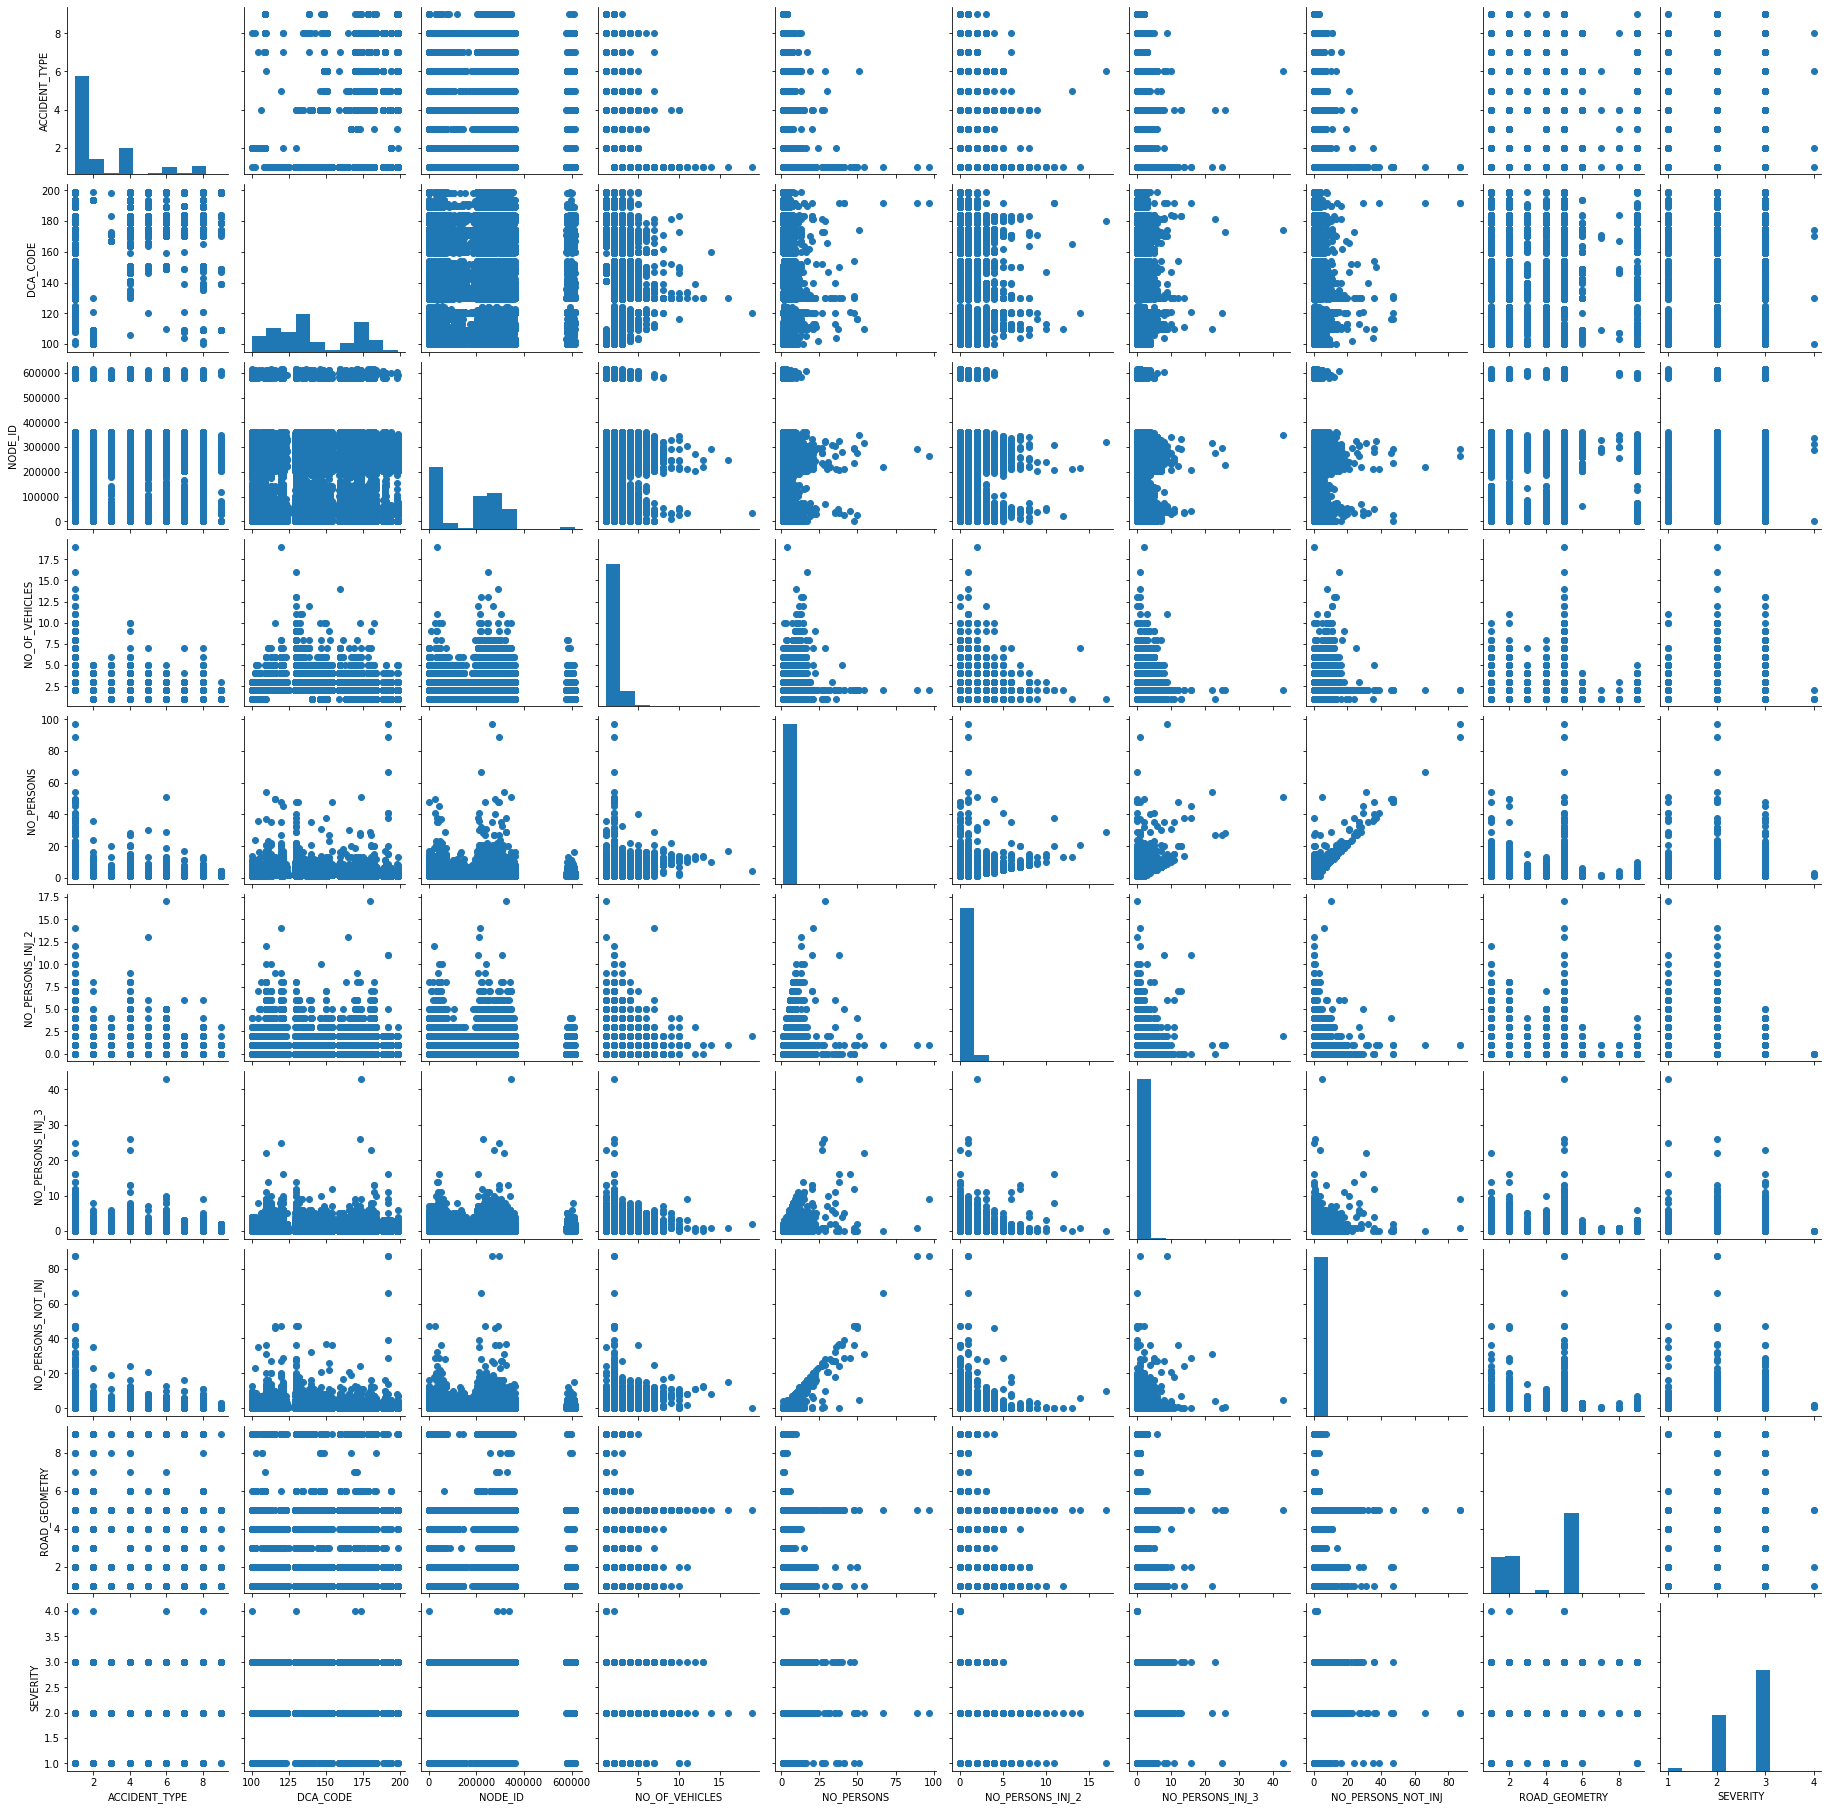

In [19]:
g = sns.PairGrid(df_continuous, vars=var_cont_high_corr)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

# <font color='green'> Categorical variables </font>


In [20]:
df_categorical = data.select_dtypes(exclude=['int64'])
print(list(zip(np.arange(100),df_categorical.columns.tolist())))
print('data_shape:',df_categorical.shape)

[(0, 'ACCIDENT_NO'), (1, 'ACCIDENTDATE'), (2, 'ACCIDENTTIME'), (3, 'Accident Type Desc'), (4, 'Day Week Description'), (5, 'DCA Description'), (6, 'DIRECTORY'), (7, 'EDITION'), (8, 'PAGE'), (9, 'GRID_REFERENCE_X'), (10, 'GRID_REFERENCE_Y'), (11, 'Light Condition Desc'), (12, 'Road Geometry Desc')]
data_shape: (186546, 13)


In [21]:
# Data processing - null values
df_categorical[df_categorical.isnull()]
df_categorical.isnull().values.any()
df_categorical.isnull().sum()

ACCIDENT_NO                0
ACCIDENTDATE               0
ACCIDENTTIME               0
Accident Type Desc         0
Day Week Description       0
DCA Description            0
DIRECTORY               1177
EDITION                 1177
PAGE                    1177
GRID_REFERENCE_X        1177
GRID_REFERENCE_Y        1177
Light Condition Desc       0
Road Geometry Desc         0
dtype: int64

In [22]:
#dropna values
df_categorical_clean=df_categorical.dropna(axis='rows')
print(df_categorical_clean.columns.tolist())
print('data_shape:',df_categorical.shape)

['ACCIDENT_NO', 'ACCIDENTDATE', 'ACCIDENTTIME', 'Accident Type Desc', 'Day Week Description', 'DCA Description', 'DIRECTORY', 'EDITION', 'PAGE', 'GRID_REFERENCE_X', 'GRID_REFERENCE_Y', 'Light Condition Desc', 'Road Geometry Desc']
data_shape: (186546, 13)


In [68]:
#df_categorical_clean.describe()

# Cramers matrix

*results in range [0,1]

C:\Users\gabriel\Miniconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


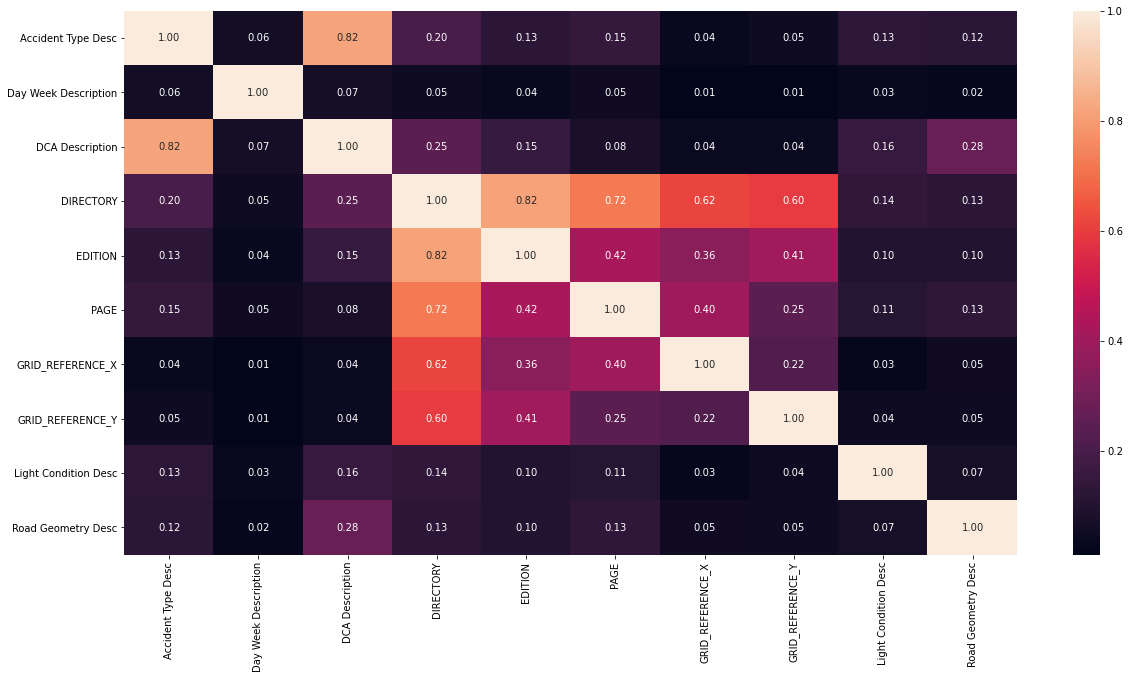

In [42]:
nominal.associations(df_categorical_clean[cols], nominal_columns='all')

#  Theil's U  matrix

*results in range [0,1]

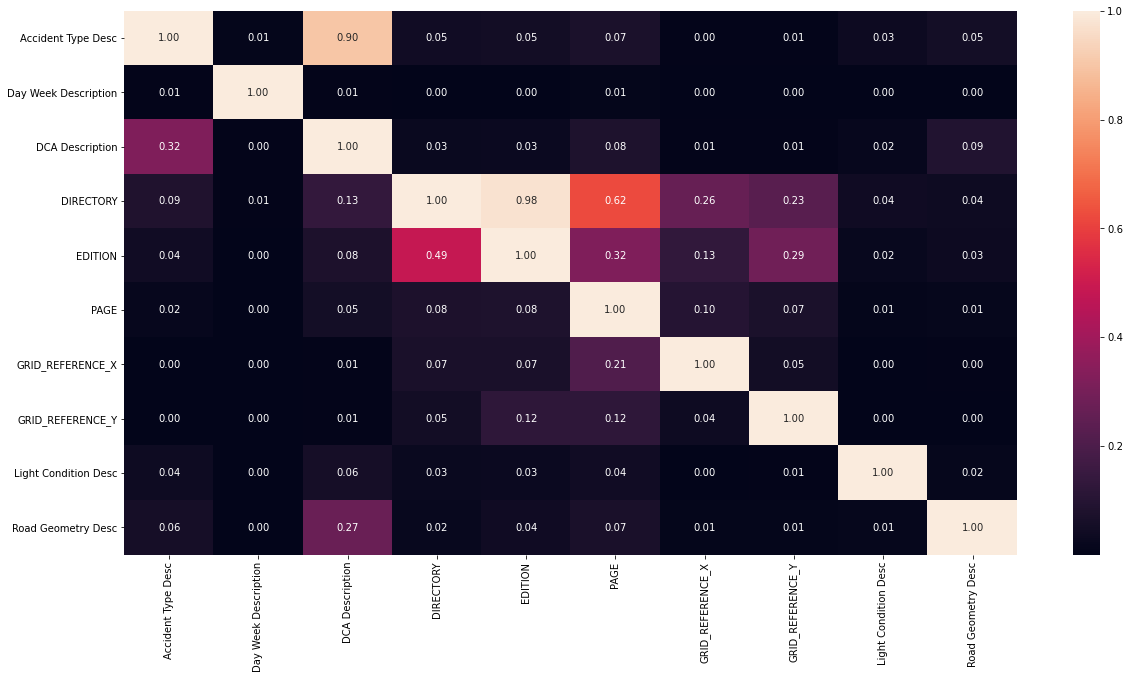

In [43]:
nominal.associations(df_categorical_clean[cols], nominal_columns='all', theil_u=True)

# <font color='green'> ALl variables </font>


In [44]:
df_both_var = data

In [50]:
# Data processing - null values
df_both_var[df_both_var.isnull()]
df_both_var.isnull().values.any()
df_both_var.isnull().sum()

True

In [48]:
df_both_var_clean=df_both_var.dropna(axis='rows')
print(df_both_var_clean.columns.tolist())
print('data_shape:',df_categorical_clean.shape)

['ACCIDENT_NO', 'ACCIDENTDATE', 'ACCIDENTTIME', 'ACCIDENT_TYPE', 'Accident Type Desc', 'DAY_OF_WEEK', 'Day Week Description', 'DCA_CODE', 'DCA Description', 'DIRECTORY', 'EDITION', 'PAGE', 'GRID_REFERENCE_X', 'GRID_REFERENCE_Y', 'LIGHT_CONDITION', 'Light Condition Desc', 'NODE_ID', 'NO_OF_VEHICLES', 'NO_PERSONS', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3', 'NO_PERSONS_KILLED', 'NO_PERSONS_NOT_INJ', 'POLICE_ATTEND', 'ROAD_GEOMETRY', 'Road Geometry Desc', 'SEVERITY', 'SPEED_ZONE']
data_shape: (185369, 13)


In [69]:
#df_both_var_clean.describe()

# All variables

* continuous variables : [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) - *results in range [-1,1]
* categorical variables : [Cramér's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) and [Uncertainty coefficient or Theil's U](https://en.wikipedia.org/wiki/Uncertainty_coefficient) - *results in range [0,1]
* continuous-categorical variables : [Correlation ratio](https://en.wikipedia.org/wiki/Correlation_ratio)- *results in range [0,1]

Note that tha range are different


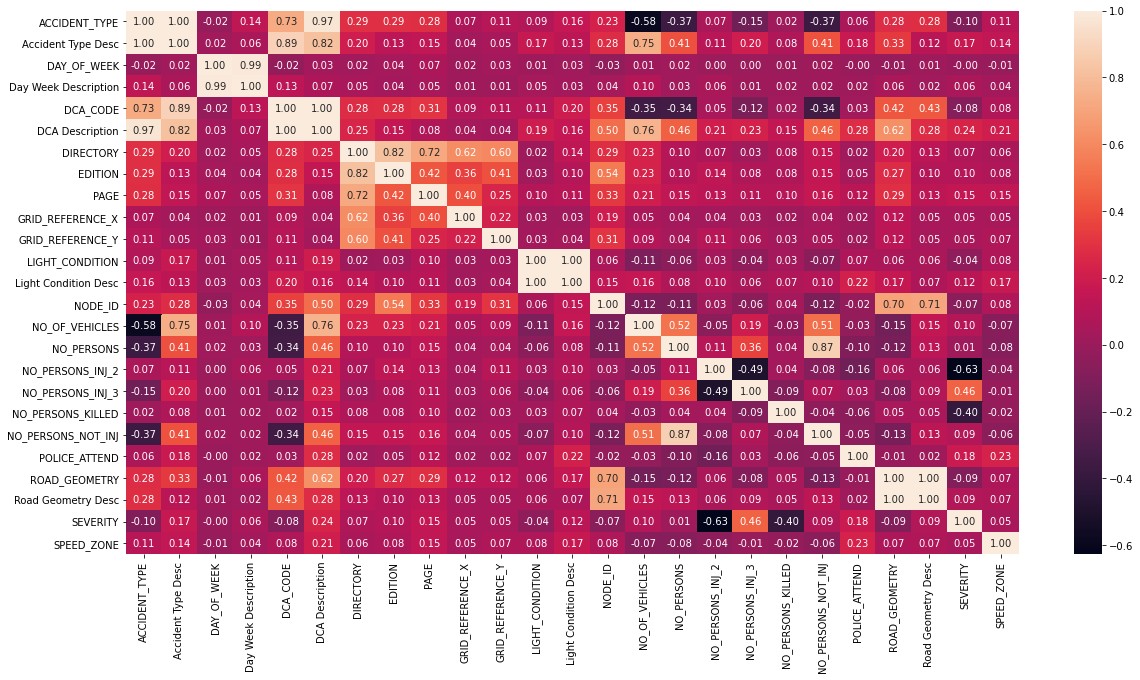

In [76]:
cols_categ = ['Accident Type Desc', 'Day Week Description', 'DCA Description', 'DIRECTORY', 'EDITION', 'PAGE', 'GRID_REFERENCE_X', 'GRID_REFERENCE_Y', 'Light Condition Desc', 'Road Geometry Desc']
nominal.associations(df_both_var_clean.iloc[:,3:],  nominal_columns= cols_categ )

# Continuous - categorical

* continuous-categorical variables : [Correlation ratio](https://en.wikipedia.org/wiki/Correlation_ratio)- *results in range [0,1]


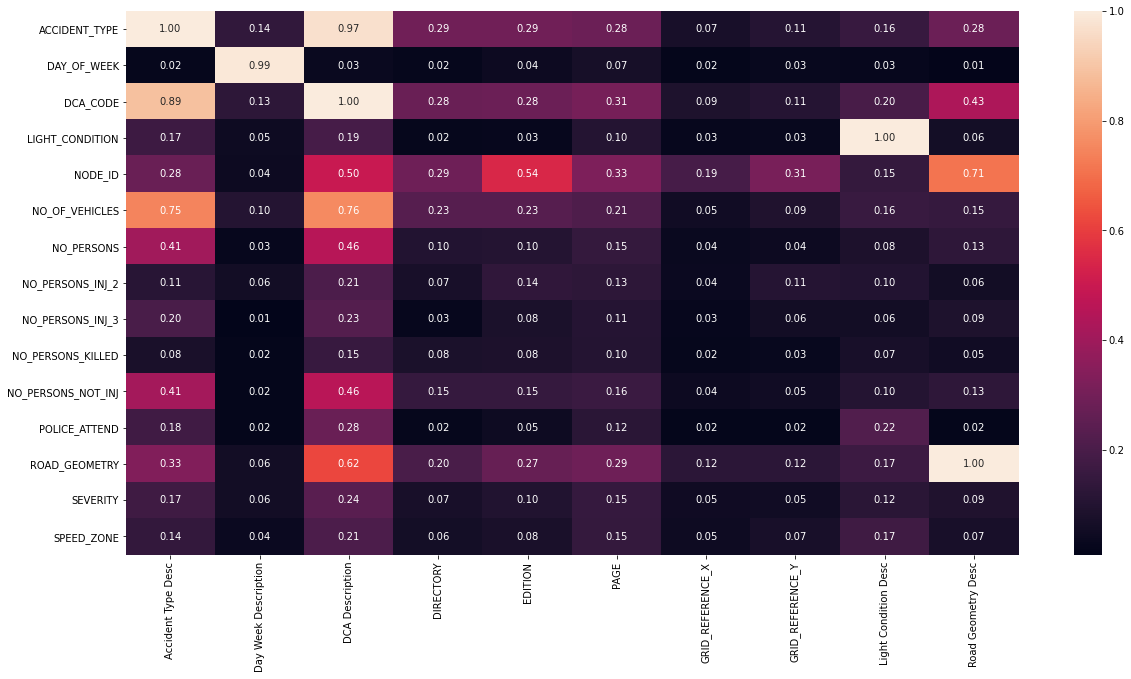

In [100]:
assoc = nominal.associations(df_both_var_clean.iloc[:,3:],  nominal_columns= cols_categ, plot=False, return_results=True )
cols_cont = df_continuous.columns.tolist()
sns.heatmap(assoc.loc[cols_cont,cols_categ], annot=True, fmt='.2f')

In [145]:
dummy_days_week = pd.get_dummies(df['Day Week Description'])
dummy_light_condition = pd.get_dummies(df['Light Condition Desc'])
